DSCI 552 Homework 2
Zeru Zhou
Github username: Zeruuuuu
USCID: 9208-8181-38

# Question 1 
## (a) Download the AReM data 

In [644]:
import pandas as pd
import os
import numpy as np
from scipy.stats import bootstrap
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from warnings import simplefilter
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, RocCurveDisplay, auc
import matplotlib.pyplot as plt
import imblearn
from math import e
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB, MultinomialNB

Datasets are downloaded.

## (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [645]:
test = []
train = []
my_dir = '../data/AReM/'

In [646]:
dir_name = sorted([name for name in os.listdir(my_dir) if os.path.isdir(os.path.join(my_dir, name))])
dir_name

['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

In [647]:
sorted(os.listdir('../data/AReM/cycling'), key = lambda x: int(x[7:-4]))

['dataset1.csv',
 'dataset2.csv',
 'dataset3.csv',
 'dataset4.csv',
 'dataset5.csv',
 'dataset6.csv',
 'dataset7.csv',
 'dataset8.csv',
 'dataset9.csv',
 'dataset10.csv',
 'dataset11.csv',
 'dataset12.csv',
 'dataset13.csv',
 'dataset14.csv',
 'dataset15.csv']

In [648]:
for Dir in dir_name:
    files = sorted(os.listdir(os.path.join(my_dir, Dir)),key = lambda x: int(x[7:-4]))
    if Dir in ['bending1','bending2']:
        for file in files[0:2]:
            test.append([pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))])
        for file in files[2:]:
            train.append([pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))])
    else:
        for file in files[0:3]:
            test.append([pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))])
        for file in files[3:]:
            train.append([pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))])          

In [649]:
len(test), len(train)

(19, 69)

In [650]:
test_df = []
train_df = []

In [651]:
for Dir in dir_name:
    test_sub = []
    train_sub = []
    files = sorted(os.listdir(os.path.join(my_dir, Dir)),key = lambda x: int(x[7:-4]))
    if Dir in ['bending1','bending2']:
        for file in files[0:2]:
            test_sub.extend([pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))])
        for file in files[2:]:
            train_sub.extend([pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))])
    else:
        for file in files[0:3]:
            test_sub.extend([pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))])
        for file in files[3:]:
            train_sub.extend([pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))]) 
    test_df.append(pd.concat(test_sub))
    train_df.append(pd.concat(train_sub))

In [652]:
len(test_df), len(train_df)

(7, 7)

As above, I used 2 ways to create train/test:
1. put all 19 test dataframes and 69 train dataframes into seperate lists for storage.
2. create 1 train dataframe and 1 test dataframe for each action seperately, 7 train and 7 test dataframes as total.

## (c) Feature Extraction
### Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.
### (i) Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

Time domain features used in time series classification are: minimum, maximum, mean, median, standard deviation, first quartile, third quartile, skewness, and kurtosis.

### (ii) Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance.

In [653]:
my_dict = {'Instance': np.arange(1,89)}

In [654]:
for Dir in dir_name:
    files = sorted(os.listdir(os.path.join(my_dir, Dir)),key = lambda x: int(x[7:-4]))
    for file in files:
        df = pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(1,7))
        my_dict['label'] = []
        num = 0
        for columns in df.columns:
            num += 1
            my_dict["min"+str(num)] = []
            my_dict["max"+str(num)] = []
            my_dict["mean"+str(num)] = []
            my_dict["median"+str(num)] = []
            my_dict["std"+str(num)] = []
            my_dict["1st quart"+str(num)] = []
            my_dict["3rd quart"+str(num)] = []

In [655]:
for Dir in dir_name:
    files = sorted(os.listdir(os.path.join(my_dir, Dir)),key = lambda x: int(x[7:-4]))
    for file in files:
        df = pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(1,7))
        my_dict['label'].append(Dir)
        num = 0
        for columns in df.columns:
            num += 1
            my_dict["min"+str(num)].append(df[columns].min())
            my_dict["max"+str(num)].append(df[columns].max())
            my_dict["mean"+str(num)].append(df[columns].mean())
            my_dict["median"+str(num)].append(df[columns].median())
            my_dict["std"+str(num)].append(np.std(df[columns]))
            my_dict["1st quart"+str(num)].append(df[columns].describe()[4])
            my_dict["3rd quart"+str(num)].append(df[columns].describe()[6])

In [656]:
my_df = pd.DataFrame(my_dict)
my_df = my_df.reset_index(drop = True)
my_df

Instance     label   min1   max1      mean1  median1      std1  \
0          1  bending1  37.25  45.00  40.624792    40.50  1.475428   
1          2  bending1  38.00  45.67  42.812812    42.50  1.434054   
2          3  bending1  35.00  47.40  43.954500    44.33  1.557210   
3          4  bending1  33.00  47.75  42.179813    43.50  3.666840   
4          5  bending1  33.00  45.75  41.678063    41.75  2.241152   
..       ...       ...    ...    ...        ...      ...       ...   
83        84   walking  19.50  45.33  33.586875    34.25  4.646088   
84        85   walking  19.75  45.50  34.322750    35.25  4.747524   
85        86   walking  19.50  46.00  34.546229    35.25  4.837247   
86        87   walking  23.50  46.25  34.873229    35.25  4.526997   
87        88   walking  19.25  44.00  34.473188    35.00  4.791706   

    1st quart1  3rd quart1  min2  ...      std5  1st quart5  3rd quart5  min6  \
0        39.25     42.0000   0.0  ...  2.186168     33.0000       36.00  0.00   
1        42.00     43.6700   0.0  ...  1.993175     32.0000       34.50  0.00   
2        43.00     45.0000   0.0  ...  1.997520     35.3625       36.50  0.00   
3        39.15     45.0000   0.0  ...  3.845436     30.4575       36.33  0.00   
4        41.33     42.7500   0.0  ...  2.408514     28.4575       31.25  0.00   
..         ...         ...   ...  ...       ...         ...         ...   ...   
83       30.25     37.0000   0.0  ...  3.280561     13.7300       18.25  0.00   
84       31.00     38.0000   0.0  ...  3.116605     13.5000       17.75  0.00   
85       31.25     37.8125   0.0  ...  2.820182     14.0000       17.75  0.00   
86       31.75     38.2500   0.0  ...  3.127813     13.7500       18.00  0.00   
87       31.25     38.0000   0.0  ...  3.153030     13.7300       17.75  0.43   

     max6     mean6  median6      std6  1st quart6  3rd quart6  
0    1.92  0.570583     0.43  0.582308      0.0000      1.3000  
1    3.11  0.571083     0.43  0.600383      0.0000      1.3000  
2    1.79  0.493292     0.43  0.512971      0.0000      0.9400  
3    2.18  0.613521     0.50  0.523771      0.0000      1.0000  
4    1.79  0.383292     0.43  0.388759      0.0000      0.5000  
..    ...       ...      ...       ...         ...         ...  
83   8.32  3.259729     3.11  1.638534      2.0500      4.3225  
84   9.67  3.432562     3.20  1.730921      2.1575      4.5650  
85  10.00  3.338125     3.08  1.655016      2.1600      4.3350  
86   9.51  3.424646     3.27  1.689198      2.1700      4.5000  
87   9.00  3.340458     3.09  1.697343      2.1200      4.3750  

[88 rows x 44 columns]

As above, dataset with 88 instances is created, with label.

### (iii) Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [657]:
std = []
for column in my_df.columns[2:]:
    std.append(np.std(my_df[column]))

In [658]:
my_col = my_df.columns[2:].tolist()

In [659]:
CI = []
my_list = my_df.columns[2:].tolist()
for column in my_list:
    dropped = pd.Series(my_df[column].dropna().tolist())
    if dropped.mean() == 0:
        CI.append(0)
        continue
    boot = bootstrap((dropped,), np.std, confidence_level = 0.9)
    CI.append(boot.confidence_interval)

In [660]:
dataframe = pd.DataFrame({'feature_name': my_col, 'estimated_std': std, 'bootstrap CI': CI})
dataframe

feature_name  estimated_std                               bootstrap CI
0          min1       9.568541    (8.571850421073153, 11.214841818678776)
1          max1       4.183493     (3.315912585907919, 5.355940409653474)
2         mean1       5.246019      (4.727658995728454, 5.94059966011159)
3       median1       5.355577     (4.827192871713871, 6.053054466950167)
4          std1       1.759237    (1.5990709625135762, 1.987857521953958)
5    1st quart1       6.092527     (5.605441496163932, 6.693114788790607)
6    3rd quart1       5.002031     (4.327144959985739, 5.909367069086259)
7          min2       0.000000                                          0
8          max2       5.030493    (4.681483618426669, 5.4377050747147715)
9         mean2       1.568813     (1.4157761500216297, 1.71802125039822)
10      median2       1.405398   (1.2553579431565807, 1.5467215930820881)
11         std2       0.879851   (0.8088268627603561, 0.9436377066971946)
12   1st quart2       0.942967   (0.8407597286237894, 1.0425371204195721)
13   3rd quart2       2.119053   (1.9116157960735638, 2.3063699357133474)
14         min3       2.937487    (2.777039311147461, 3.1228210280082407)
15         max3       4.792067     (4.187259609692168, 5.505768547847356)
16        mean3       3.953833     (3.433663281272656, 4.515803187620068)
17      median3       3.986577     (3.453132497529239, 4.573737470937729)
18         std3       0.945537   (0.8084681694288092, 1.2096680612709187)
19   1st quart3       4.160032     (3.6440126081865665, 4.73618187940275)
20   3rd quart3       4.129511      (3.581746146391339, 4.75004889440115)
21         min4       0.000000                                          0
22         max4       2.169234    (1.9980904017321304, 2.384312639010006)
23        mean4       1.161534   (1.0759265102805642, 1.2187691113208994)
24      median4       1.141971   (1.0613187680259544, 1.2000016908509983)
25         std4       0.455494   (0.4246756981294237, 0.4880952255104713)
26   1st quart4       0.840050    (0.7792034008750803, 0.891007708096567)
27   3rd quart4       1.546271   (1.4393909779265788, 1.6237411432289501)
28         min5       6.085924     (4.715886252099374, 7.859669890389573)
29         max5       5.740079    (4.904534049621378, 6.7293713876485155)
30        mean5       5.671149     (4.62436041570524, 6.9863190111390265)
31      median5       5.810683       (4.7419043844167, 7.152626154159748)
32         std5       1.005474   (0.8420634745635116, 1.2796554558633357)
33   1st quart5       6.086856     (5.016026924088403, 7.495449143264722)
34   3rd quart5       5.531486     (4.575047178032746, 6.800184769686873)
35         min6       0.045835                 (0.0, 0.06444269044223307)
36         max6       2.518912    (2.3077801779757707, 2.846999462100639)
37        mean6       1.150552   (1.0649547334411944, 1.2144874437189859)
38      median6       1.083576     (1.00391536912901, 1.1523417465315682)
39         std6       0.513453  (0.47963452886712166, 0.5432826213647433)
40   1st quart6       0.757152   (0.6939102025836733, 0.8106208741003164)
41   3rd quart6       1.518071   (1.4046082267289122, 1.5960467991762315)

As above, I created a table consist of feature names, estimated std, and bootstrap CI for each features.

### (iv) Use your judgement to select the three most important time-domain features

A good time domain feature should be closely related to time and scale the whole set of data instead of only part of them. In this case, features like 1st quart & median & 3rd quart may not be as good as min, max, and mean. Hence, my choice of three most important time-domain features are min, max, and mean, since they take looks at the whole dataset instead of only part of them.

# Start of Homework 4
# 2. Time Series Classification Part 2: Binary and Multiclass Classification
## (a) Binary Classification Using Logistic Regression
### i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

In [661]:
Train_df = pd.DataFrame()
Test_df = pd.DataFrame()

In [662]:
for Dir in dir_name:
    files = sorted(os.listdir(os.path.join(my_dir, Dir)),key = lambda x: int(x[7:-4]))
    if Dir in ['bending1','bending2']:
        for file in files[0:2]:
            df = pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))
            df['label'] = 'bending'
            if len(df) != 480:
                df.loc[479] = df.iloc[478]
            Test_df = pd.concat([Test_df, df])
        for file in files[2:]:
            df = pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))
            df['label'] = 'bending'
            if len(df) != 480:
                df.loc[479] = df.iloc[478]
            Train_df = pd.concat([Train_df, df])
    else:
        for file in files[0:3]:
            df = pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))
            df['label'] = 'not bending'
            if len(df) != 480:
                df.loc[479] = df.iloc[478]
            Test_df = pd.concat([Test_df, df])
        for file in files[3:]:
            df = pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))
            df['label'] = 'not bending'
            if len(df) != 480:
                df.loc[479] = df.iloc[478]
            Train_df = pd.concat([Train_df, df])

In [663]:
Train_df

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                 0      42.00       0.71      21.25       0.43      30.00   
1               250      41.50       0.50      20.25       1.48      31.25   
2               500      41.50       0.50      14.25       1.92      33.00   
3               750      40.75       0.83      15.75       0.43      33.00   
4              1000      40.00       0.71      20.00       2.74      32.75   
..              ...        ...        ...        ...        ...        ...   
475          118750      34.50       6.18       9.00       3.56      12.67   
476          119000      25.75       6.02      13.75       2.05      16.00   
477          119250      31.50       3.35      10.25       5.12      16.25   
478          119500      33.75       2.77      14.00       3.24      13.75   
479          119750      37.00       1.41      18.25       3.70      11.00   

     var_rss23        label  
0         0.00      bending  
1         1.09      bending  
2         0.00      bending  
3         0.00      bending  
4         0.43      bending  
..         ...          ...  
475       4.19  not bending  
476       1.58  not bending  
477       2.95  not bending  
478       0.43  not bending  
479       4.32  not bending  

[33120 rows x 8 columns]

In [664]:
split = np.linspace(0,33120,num = 70)
split

array([    0.,   480.,   960.,  1440.,  1920.,  2400.,  2880.,  3360.,
        3840.,  4320.,  4800.,  5280.,  5760.,  6240.,  6720.,  7200.,
        7680.,  8160.,  8640.,  9120.,  9600., 10080., 10560., 11040.,
       11520., 12000., 12480., 12960., 13440., 13920., 14400., 14880.,
       15360., 15840., 16320., 16800., 17280., 17760., 18240., 18720.,
       19200., 19680., 20160., 20640., 21120., 21600., 22080., 22560.,
       23040., 23520., 24000., 24480., 24960., 25440., 25920., 26400.,
       26880., 27360., 27840., 28320., 28800., 29280., 29760., 30240.,
       30720., 31200., 31680., 32160., 32640., 33120.])

In [665]:
train_frame = {'label':[]}
for i in [1,2,6]:
    train_frame['min'+str(i)] = []
    train_frame['max'+str(i)] = []
    train_frame['mean'+str(i)] = []

In [666]:
for i in range(len(split)-1):
    data = Train_df.iloc[int(split[i]):int(split[i+1])]
    if data.loc[0,'label'] == 'bending':
        train_frame['label'].append('bending')
    else:
        train_frame['label'].append('not bending')
    for j in [1,2,6]:
        train_frame['min'+str(j)].append(data[data.columns[j]].min())
        train_frame['max'+str(j)].append(data[data.columns[j]].max())
        train_frame['mean'+str(j)].append(data[data.columns[j]].mean())

In [667]:
train_dataframe = pd.DataFrame(train_frame)
train_dataframe

label   min1   max1      mean1  min2   max2     mean2  min6   max6  \
0       bending  35.00  47.40  43.954500   0.0   1.70  0.426250  0.00   1.79   
1       bending  33.00  47.75  42.179813   0.0   3.00  0.696042  0.00   2.18   
2       bending  33.00  45.75  41.678063   0.0   2.83  0.535979  0.00   1.79   
3       bending  37.00  48.00  43.454958   0.0   1.58  0.378083  0.00   5.26   
4       bending  36.25  48.00  43.969125   0.0   1.50  0.413125  0.00   2.96   
..          ...    ...    ...        ...   ...    ...       ...   ...    ...   
64  not bending  19.50  45.33  33.586875   0.0  14.67  4.576562  0.00   8.32   
65  not bending  19.75  45.50  34.322750   0.0  13.47  4.456333  0.00   9.67   
66  not bending  19.50  46.00  34.546229   0.0  12.47  4.371958  0.00  10.00   
67  not bending  23.50  46.25  34.873229   0.0  14.82  4.380583  0.00   9.51   
68  not bending  19.25  44.00  34.473188   0.0  13.86  4.359312  0.43   9.00   

       mean6  
0   0.493292  
1   0.613521  
2   0.383292  
3   0.679646  
4   0.555313  
..       ...  
64  3.259729  
65  3.432562  
66  3.338125  
67  3.424646  
68  3.340458  

[69 rows x 10 columns]

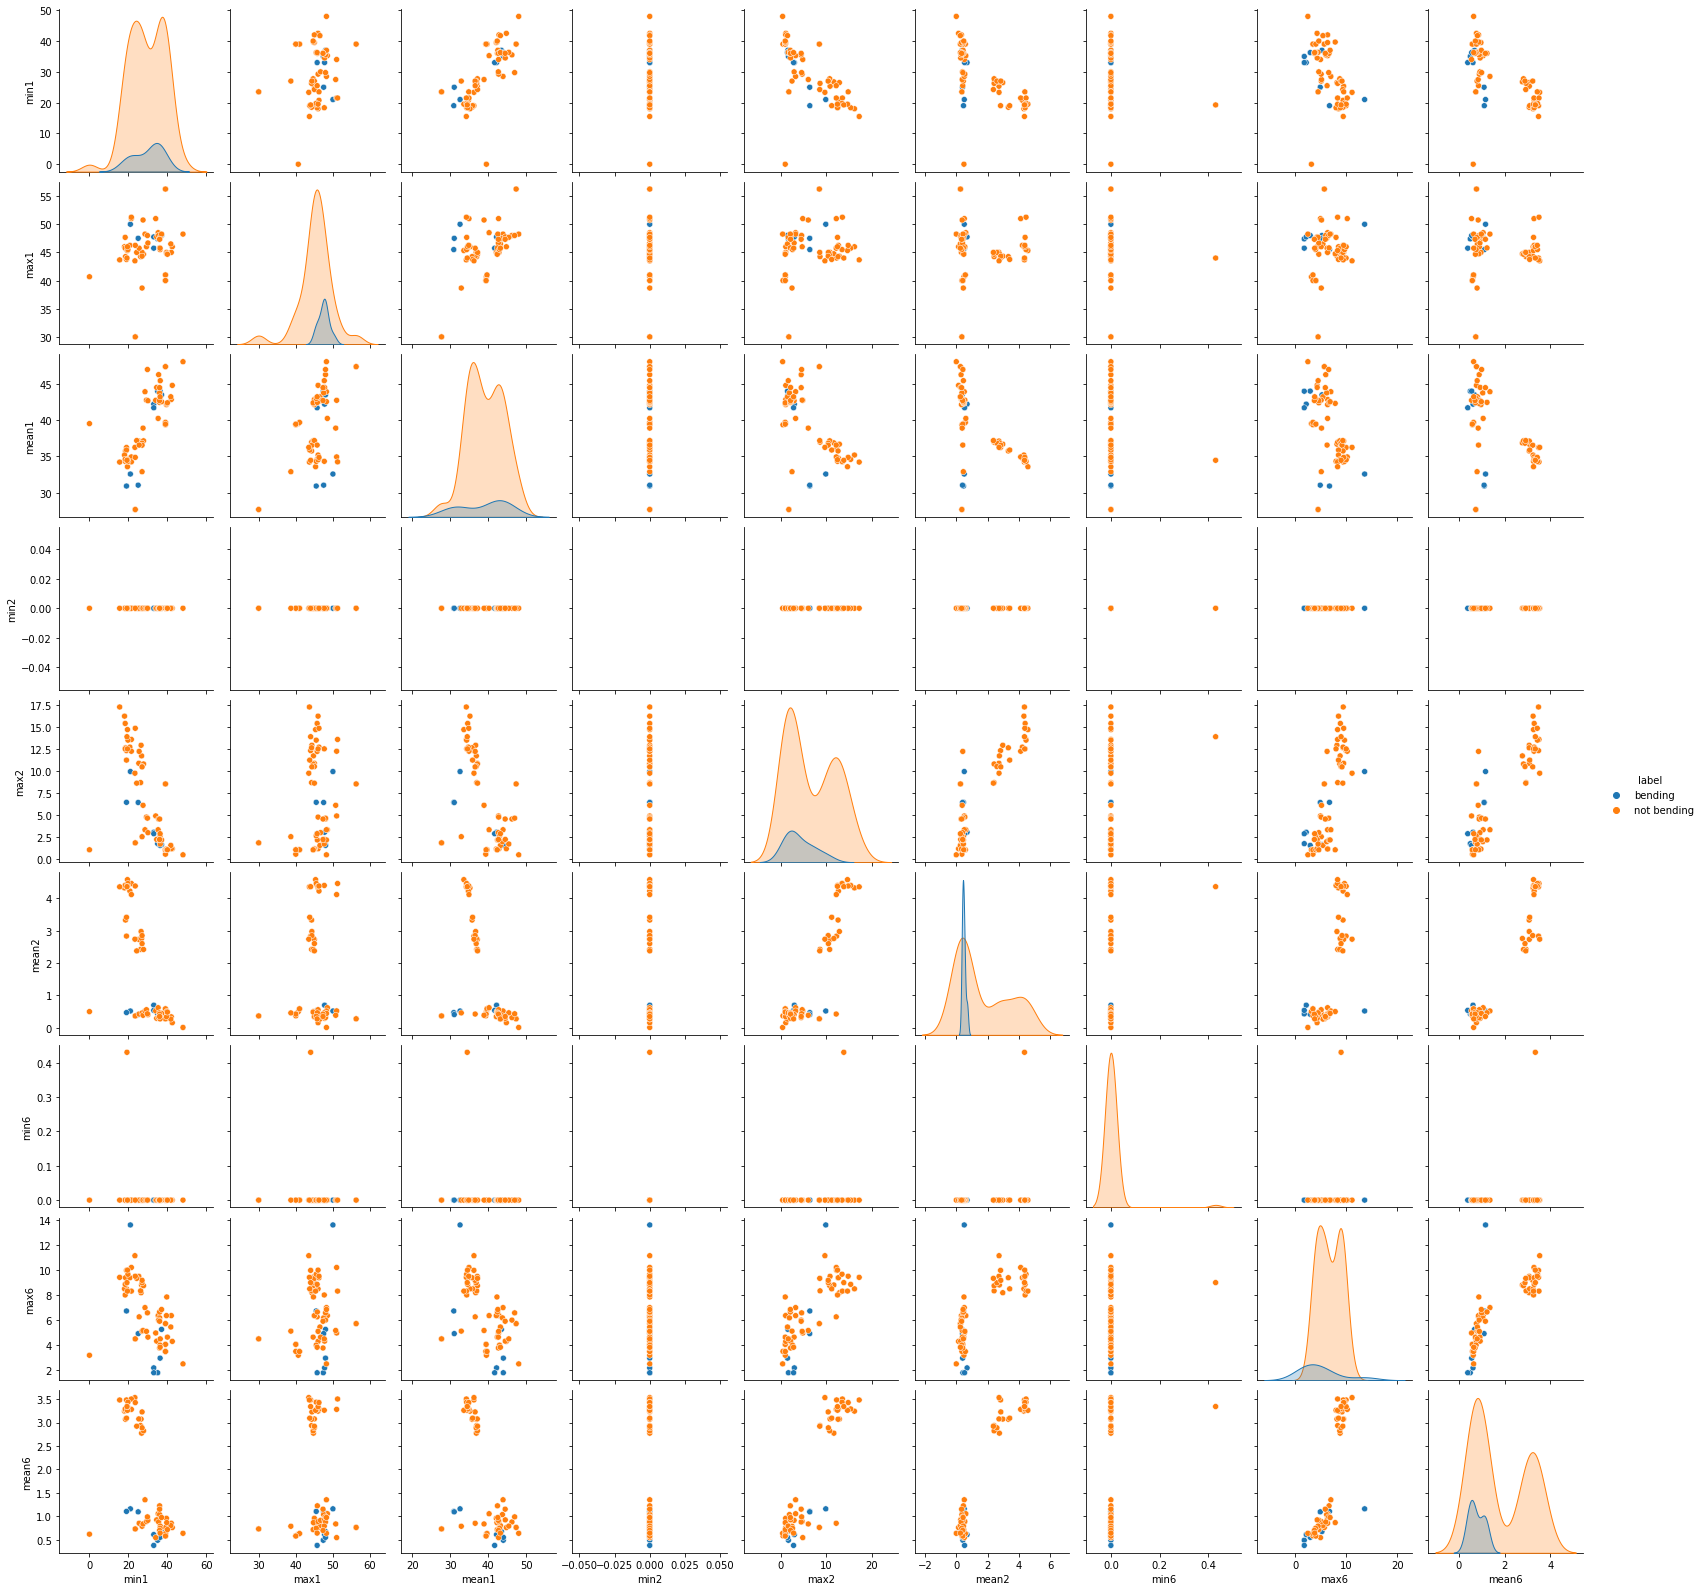

In [668]:
sns.pairplot(data = train_dataframe, hue = 'label')

### ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

In [669]:
train_frame = {'label':[]}
for i in [1,2,6]:
    train_frame['min'+str(i)+'part1'] = []
    train_frame['max'+str(i)+'part1'] = []
    train_frame['mean'+str(i)+'part1'] = []
    train_frame['min'+str(i)+'part2'] = []
    train_frame['max'+str(i)+'part2'] = []
    train_frame['mean'+str(i)+'part2'] = []

In [670]:
for i in range(len(split)-1):
    data = Train_df.iloc[int(split[i]):int(split[i+1])]
    if data.loc[0,'label'] == 'bending':
        train_frame['label'].append('bending')
    else:
        train_frame['label'].append('not bending')
    part1 = data[0:240]
    part2 = data[240:]
    part = [part1, part2]
    for k in [1,2]:
        for j in [1,2,6]:
            train_frame['min'+str(j)+'part'+str(k)].append(part[k-1][part[k-1].columns[j]].min())
            train_frame['max'+str(j)+'part'+str(k)].append(part[k-1][part[k-1].columns[j]].max())
            train_frame['mean'+str(j)+'part'+str(k)].append(part[k-1][part[k-1].columns[j]].mean())

In [671]:
train_df = pd.DataFrame(train_frame)
train_df

label  min1part1  max1part1  mean1part1  min1part2  max1part2  \
0       bending      36.50      46.50   44.057167      35.00      47.40   
1       bending      33.75      47.75   43.278875      33.00      46.00   
2       bending      33.00      45.75   41.621208      39.25      43.67   
3       bending      39.00      48.00   44.117042      37.00      46.50   
4       bending      36.67      45.00   43.486208      36.25      48.00   
..          ...        ...        ...         ...        ...        ...   
64  not bending      19.50      45.00   33.334500      22.25      45.33   
65  not bending      20.33      44.50   34.036750      19.75      45.50   
66  not bending      19.50      43.33   34.033875      20.25      46.00   
67  not bending      24.33      44.00   34.920792      23.50      46.25   
68  not bending      19.25      44.00   34.916792      20.75      43.33   

    mean1part2  min2part1  max2part1  mean2part1  min2part2  max2part2  \
0    43.851833        0.0       1.50    0.381042       0.00       1.70   
1    41.080750        0.0       3.00    0.673292       0.00       2.86   
2    41.734917        0.0       2.83    0.623083       0.00       1.12   
3    42.792875        0.0       1.30    0.250042       0.00       1.58   
4    44.452042        0.0       1.30    0.378667       0.00       1.50   
..         ...        ...        ...         ...        ...        ...   
64   33.839250        0.0      11.78    4.408083       0.00      14.67   
65   34.608750        0.0      13.47    4.778292       0.00      12.50   
66   35.058583        0.0      12.47    4.574625       0.00      12.28   
67   34.825667        0.0      14.82    4.177958       0.43      12.26   
68   34.029583        0.0      13.86    4.262333       0.00      12.97   

    mean2part2  min6part1  max6part1  mean6part1  min6part2  max6part2  \
0     0.471458       0.00       1.79    0.598250       0.00       1.50   
1     0.718792       0.00       1.53    0.640958       0.00       2.18   
2     0.448875       0.00       1.79    0.419083       0.00       1.50   
3     0.506125       0.00       5.26    0.815417       0.00       4.06   
4     0.447583       0.00       2.28    0.524875       0.00       2.96   
..         ...        ...        ...         ...        ...        ...   
64    4.745042       0.00       8.29    3.229167       0.43       8.32   
65    4.134375       0.47       8.41    3.543708       0.00       9.67   
66    4.169292       0.00      10.00    3.244042       0.00       8.64   
67    4.583208       0.00       9.18    3.430625       0.00       9.51   
68    4.456292       0.43       9.00    3.439917       0.43       8.26   

    mean6part2  
0     0.388333  
1     0.586083  
2     0.347500  
3     0.543875  
4     0.585750  
..         ...  
64    3.290292  
65    3.321417  
66    3.432208  
67    3.418667  
68    3.241000  

[69 rows x 19 columns]

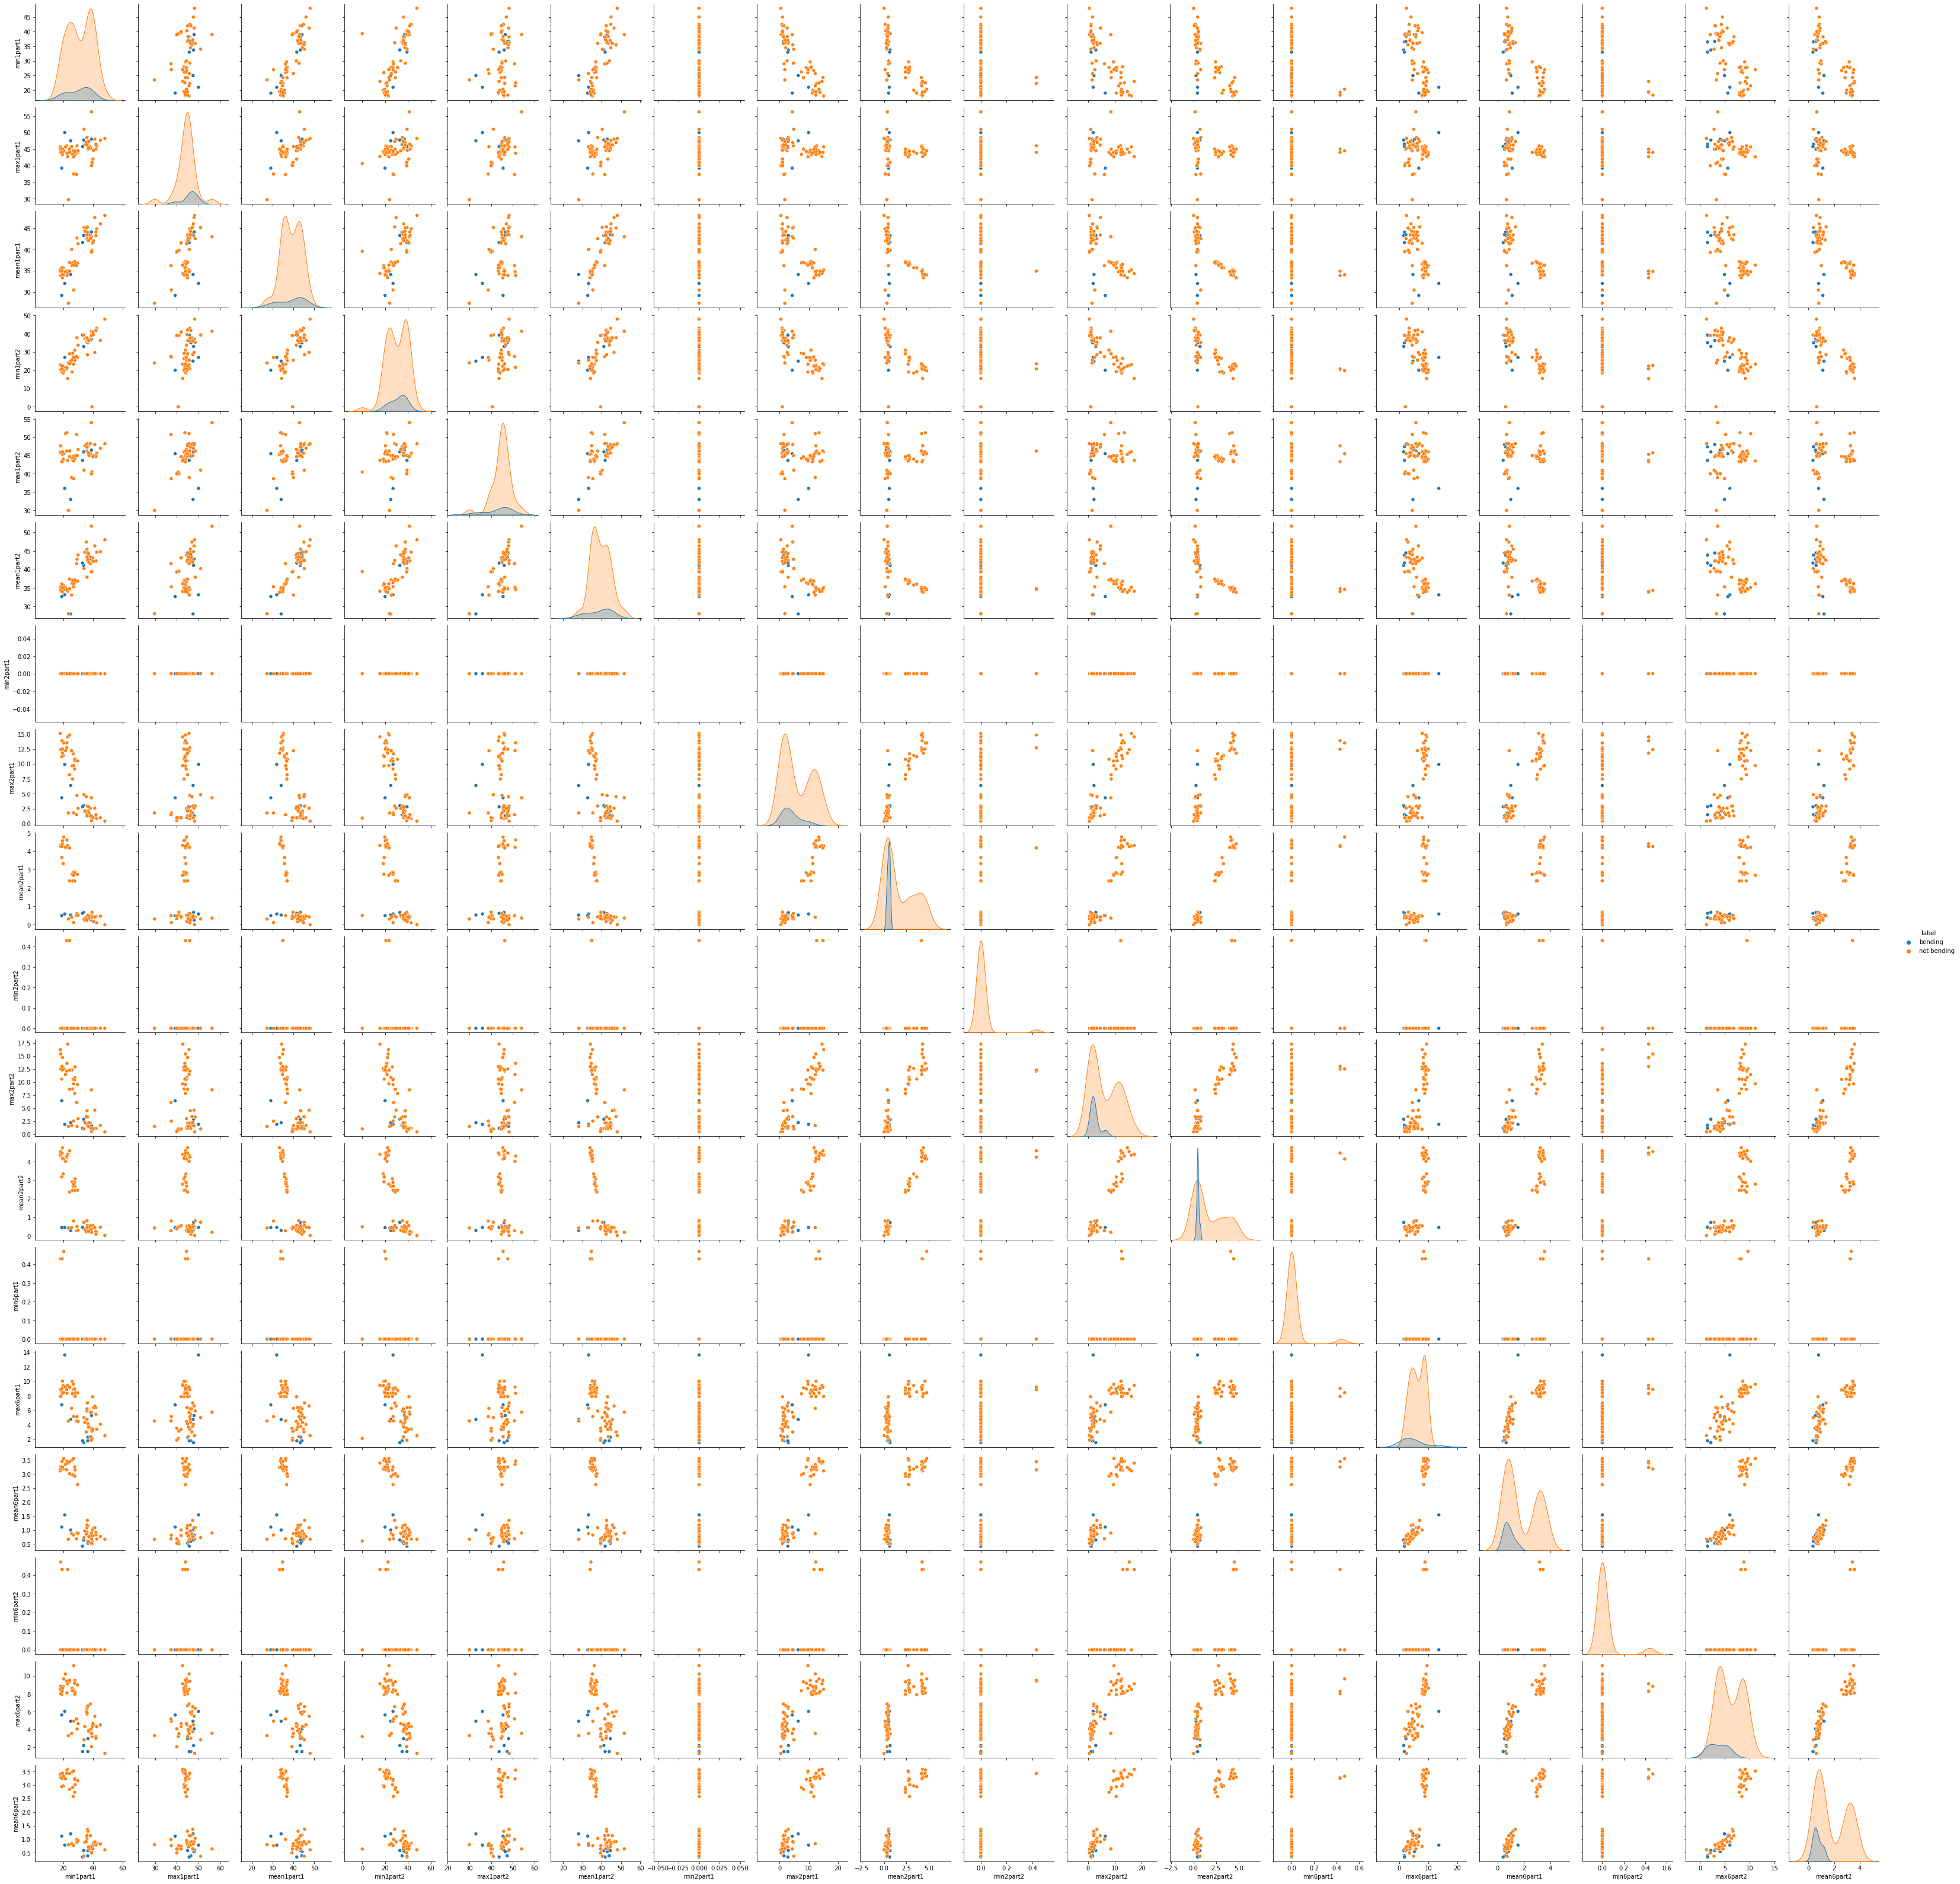

In [672]:
sns.pairplot(data = train_df, hue = 'label')

I can see that there are some difference between this question and the last one since we doubed the features and splited every individual time series. We have more comparisons between different parts of different time series, which is far more detailized.

### iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features.

In [673]:
l_num = np.arange(20)+1

In [674]:
train_list = []

In [675]:
for l in l_num:
    globals()['train'+str(l)] = {'label':[]}
    sub_split = np.linspace(0,480,num = l+1)
    for i in range(l):
        for j in range(6):
            globals()['train'+str(l)]['min'+str(j+1)+'part'+str(i+1)] = []
            globals()['train'+str(l)]['max'+str(j+1)+'part'+str(i+1)] = []
            globals()['train'+str(l)]['mean'+str(j+1)+'part'+str(i+1)] = []
    for i in range(len(split)-1):
        data = Train_df.iloc[int(split[i]): int(split[i+1])]
        if data.loc[0,'label'] == 'bending':
            globals()['train'+str(l)]['label'].append(1)
        else:
            globals()['train'+str(l)]['label'].append(0)
        part = []
        for j in range(l):
            pt = data.iloc[int(sub_split[j]):int(sub_split[j+1])]
            part.append(pt)
        for k in range(l):
            for c in range(6):
                globals()['train'+str(l)]['min'+str(c+1)+'part'+str(k+1)].append(part[k][part[k].columns[c+1]].min())
                globals()['train'+str(l)]['max'+str(c+1)+'part'+str(k+1)].append(part[k][part[k].columns[c+1]].max())
                globals()['train'+str(l)]['mean'+str(c+1)+'part'+str(k+1)].append(part[k][part[k].columns[c+1]].mean())
    df = pd.DataFrame(globals()['train'+str(l)])
    train_list.append(df)

In [676]:
my_Dict = {'L':[], 'P':[], 'Cross_val_score':[]}
simplefilter(action='ignore', category=FutureWarning)
for i,df in enumerate(train_list):
    df.dropna(inplace = True)
    target = df['label']
    feature = df.drop(columns = 'label')
    Log = LogisticRegression(max_iter = 500, penalty = 'none')
    my_Dict['L'].append(i+1)
    x,y = target.value_counts()
    selector = RFECV(Log, cv = 5).fit(feature, target)
    my_Dict['P'].append(selector.n_features_)
    num = selector.n_features_
    my_Dict['Cross_val_score'].append(selector.cv_results_['mean_test_score'][num])

In [677]:
my_df = pd.DataFrame(my_Dict)
my_df

L    P  Cross_val_score
0    1    6         0.985714
1    2    4         0.970330
2    3    4         0.984615
3    4    1         0.970330
4    5    5         0.956044
5    6    5         0.970330
6    7   16         0.969231
7    8   27         0.954945
8    9    6         0.970330
9   10    1         0.927473
10  11    1         0.926374
11  12    6         0.985714
12  13    2         0.985714
13  14    1         0.984615
14  15  144         0.970330
15  16   16         1.000000
16  17   13         0.985714
17  18    4         0.984615
18  19   18         1.000000
19  20   21         0.984615

In [678]:
cleaned_df = my_df.loc[(my_df['P'] > 1) & (my_df['Cross_val_score'] < 1)]
score = cleaned_df['Cross_val_score'].tolist()
best_model = cleaned_df.loc[cleaned_df['Cross_val_score'] == max(score)][1:2]
best_model

L  P  Cross_val_score
11  12  6         0.985714

As the above results, I used stratified KFold when the class is imbalanced, and RFE to subset the feature space to the optimal number of features. I located the grid scores, and excluded the unrealistic cases like p=1. Finally, I got the optimal (l,p) as (12,6) ranked by the grid score. The right way is to cross validate before the model is fitted to the training set. If already fitted, then cross-validation lost its meaning.

### iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi ’s as well as the p-values associated with them.

In [679]:
df = train_list[11]
df.dropna(inplace = True)
target = df['label']
feature = df.drop(columns = 'label')
Log = LogisticRegression(max_iter = 500, penalty = 'none')
selector = RFECV(Log, cv = 5).fit(feature, target)
feature_name = selector.get_feature_names_out().tolist()
feature_new = feature[[x for x in feature_name]]
Log_new = LogisticRegression(max_iter = 500, penalty = 'none').fit(feature_new, target)
train_pred = Log_new.predict(feature_new)
cm = confusion_matrix(target,train_pred)
cm

array([[60,  0],
       [ 0,  8]])

In [680]:
accuracy_score = accuracy_score(target,train_pred)
print(f'The train score is: {accuracy_score}')

The train score is: 1.0


In [681]:
y_pred_proba = Log_new.predict_proba(feature_new)[::,1]
y_pred_proba

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99997984e-01,
       9.99999241e-01, 1.00000000e+00, 9.99999998e-01, 9.99999999e-01,
       6.54640634e-18, 3.71910807e-17, 5.51952165e-12, 1.04850852e-12,
       2.03527095e-10, 8.76999512e-10, 1.62774425e-11, 2.83177626e-08,
       7.62401509e-11, 1.66454384e-18, 4.24724595e-07, 3.11550179e-08,
       5.46970136e-28, 3.12241456e-31, 1.11929604e-18, 1.48241448e-13,
       6.66892912e-08, 5.11056684e-29, 1.39062756e-11, 2.97936486e-31,
       3.12241456e-31, 1.48241448e-13, 5.11056684e-29, 1.39062756e-11,
       1.01464064e-07, 1.82293375e-06, 5.59130750e-08, 5.01599347e-15,
       1.02668790e-15, 1.63277196e-13, 1.37865726e-19, 5.22351112e-20,
       1.64342390e-21, 3.71160910e-17, 1.84972476e-26, 7.22664158e-14,
       1.42558945e-20, 1.27748299e-22, 1.91217726e-19, 4.30107095e-17,
       1.42193393e-21, 5.77697124e-19, 2.39608653e-25, 5.34634068e-16,
       8.22330451e-12, 1.76428475e-12, 2.34177626e-06, 1.26975457e-19,
      

In [682]:
fpr, tpr, thod = roc_curve(target, y_pred_proba)

Text(0.5, 1.0, 'ROC curve')

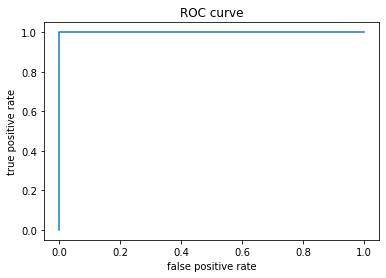

In [683]:
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')

In [684]:
auc = auc(fpr, tpr)
print(f'The auc score is: {auc}')

The auc score is: 1.0


In [685]:
Logistic = sm.GLM(target, feature_new).fit()

In [686]:
print(Logistic.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                   68
Model:                            GLM   Df Residuals:                       62
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                        0.036591
Method:                          IRLS   Log-Likelihood:                 19.123
Date:                Tue, 18 Oct 2022   Deviance:                       2.2686
Time:                        02:27:11   Pearson chi2:                     2.27
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8548
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
min5part2      0.0168      0.008      2.006      0.0

In [687]:
Logistic.params

min5part2     0.016760
mean5part2    0.018798
min5part4    -0.003006
max1part7    -0.017225
max1part9     0.007926
min5part11    0.011010
dtype: float64

In [688]:
Logistic.pvalues

min5part2     0.044803
mean5part2    0.034158
min5part4     0.611742
max1part7     0.057481
max1part9     0.377269
min5part11    0.044602
dtype: float64

As above, I got the confusion matrix, ROC curve, AUC score, parameters and p-values for the selected logistic regression model.

### v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [689]:
Test_df

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      39.25       0.43      22.75       0.43      33.75   
1                250      39.25       0.43      23.00       0.00      33.00   
2                500      39.25       0.43      23.25       0.43      33.00   
3                750      39.50       0.50      23.00       0.71      33.00   
4               1000      39.50       0.50      24.00       0.00      33.00   
..               ...        ...        ...        ...        ...        ...   
475           118750      36.00       2.45      17.00       5.10      20.50   
476           119000      34.33       1.89      15.00       2.45      17.00   
477           119250      33.00       7.35      14.60       3.14      13.00   
478           119500      31.67       1.25      11.00       6.16      19.25   
479           119750      30.75      10.21      11.75       1.09      18.50   

     var_rss23        label  
0         1.30      bending  
1         0.00      bending  
2         0.00      bending  
3         0.00      bending  
4         0.00      bending  
..         ...          ...  
475       0.87  not bending  
476       2.12  not bending  
477       5.70  not bending  
478       2.17  not bending  
479       3.20  not bending  

[9120 rows x 8 columns]

In [690]:
test_frame = {'label':[]}
split_test = np.linspace(0,9120,num = 20)
for i in range(12):
    for j in range(6):
        test_frame['min'+str(j+1)+'part'+str(i+1)] = []
        test_frame['max'+str(j+1)+'part'+str(i+1)] = []
        test_frame['mean'+str(j+1)+'part'+str(i+1)] = []
subsplit = np.linspace(0,480,num = 13)
for i in range(len(split_test)-1):
    data = Test_df.iloc[int(split_test[i]):int(split_test[i+1])]
    if data.loc[0,'label'] == 'bending':
        test_frame['label'].append(1)
    else:
        test_frame['label'].append(0)
    part = []
    for j in range(12):
        pt = data.iloc[int(subsplit[j]):int(subsplit[j+1])]
        part.append(pt)
    for k in range(12):
        for col in range(6):
            test_frame['min'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].min())
            test_frame['max'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].max())
            test_frame['mean'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].mean())
test_df = pd.DataFrame(test_frame)

In [691]:
test_feature = test_df[[x for x in feature_name]]
test_target = test_df['label']
test_pred = Log_new.predict(test_feature)
score = Log_new.score(test_feature, test_target)
print(f'The accuracy score for test is {score}')

The accuracy score for test is 1.0


As above, the test score is 1.0 and the cross_validation score is 0.986. Looks test result is pretty good but the sample size is quite small.

### vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Yes it is linearly separable causing instability in calculating regression parameters. I need to set up a max_iter in logistic regression to end the iteration on my own.

### vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

In [692]:
my_Dict = {'L':[], 'P':[], 'Cross_val_score':[]}
simplefilter(action='ignore', category=FutureWarning)
for i,df in enumerate(train_list):
    df.dropna(inplace = True)
    target = df['label']
    feature = df.drop(columns = 'label')
    smote = imblearn.over_sampling.SMOTE(random_state = 42)
    feature, target = smote.fit_resample(feature, target)
    Log = LogisticRegression(max_iter = 500, penalty = 'none')
    my_Dict['L'].append(i+1)
    selector = RFECV(Log, cv = 5).fit(feature, target)
    my_Dict['P'].append(selector.n_features_)
    my_Dict['Cross_val_score'].append(selector.cv_results_['mean_test_score'][selector.n_features_])

In [693]:
df = pd.DataFrame(my_Dict)
df

L   P  Cross_val_score
0    1   5         0.991667
1    2  10         1.000000
2    3   1         0.991667
3    4  29         0.991667
4    5   3         0.983333
5    6   3         0.991667
6    7   3         0.991667
7    8   4         0.991667
8    9   4         0.991667
9   10   3         0.983333
10  11   3         0.991667
11  12   9         1.000000
12  13   9         1.000000
13  14   3         0.991667
14  15   4         0.983333
15  16  16         1.000000
16  17   4         0.991667
17  18   4         1.000000
18  19   3         0.975000
19  20   2         0.983333

In [694]:
cleaned_df = df.loc[(df['P'] > 1) & (df['Cross_val_score'] < 1)]
score = cleaned_df['Cross_val_score'].tolist()
best_model = cleaned_df.loc[cleaned_df['Cross_val_score'] == max(score)][0:1]
best_model

L  P  Cross_val_score
0  1  5         0.991667

In [695]:
df = train_list[0]
df.dropna(inplace = True)
target = df['label']
feature = df.drop(columns = 'label')
feature, target = smote.fit_resample(feature, target)
Log = LogisticRegression(max_iter = 500, penalty = 'none')
selector = RFECV(Log, cv = 5).fit(feature, target)
train_pred = selector.predict(feature)

In [696]:
test_frame = {'label':[]}
split_test = np.linspace(0,9120,num = 20)
for i in range(1):
    for j in range(6):
        test_frame['min'+str(j+1)+'part'+str(i+1)] = []
        test_frame['max'+str(j+1)+'part'+str(i+1)] = []
        test_frame['mean'+str(j+1)+'part'+str(i+1)] = []
subsplit = np.linspace(0,480,num = 2)
for i in range(len(split_test)-1):
    data = Test_df.iloc[int(split_test[i]):int(split_test[i+1])]
    if data.loc[0,'label'] == 'bending':
        test_frame['label'].append(1)
    else:
        test_frame['label'].append(0)
    part = []
    for j in range(1):
        pt = data.iloc[int(subsplit[j]):int(subsplit[j+1])]
        part.append(pt)
    for k in range(1):
        for col in range(6):
            test_frame['min'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].min())
            test_frame['max'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].max())
            test_frame['mean'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].mean())
test_df = pd.DataFrame(test_frame)

#### Results for test:

In [698]:
test_feature = test_df.drop(columns = 'label')
test_target = test_df['label'].values
test_pred = selector.predict(test_feature)
score_test = selector.score(test_feature, test_target)
print(f'The test score is: {score_test}')

The test score is: 1.0


In [699]:
cm_test = confusion_matrix(test_target, test_pred)
cm_test

array([[15,  0],
       [ 0,  4]])

Text(0.5, 1.0, 'ROC curve')

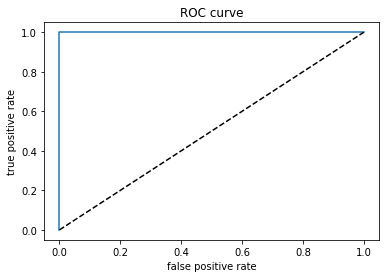

In [700]:
test_pred_proba = selector.predict_proba(test_feature)[::,1]
fpr, tpr, thod = roc_curve(test_target, test_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve')

In [701]:
auc_test = roc_auc_score(test_target, test_pred_proba)
print(f'The auc score for test is: {auc_test}')

The auc score for test is: 1.0


#### Results for train:

In [702]:
cm_train = confusion_matrix(target,train_pred)
cm_train

array([[60,  0],
       [ 0, 60]])

Text(0.5, 1.0, 'ROC curve')

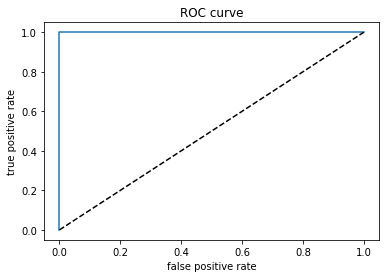

In [703]:
train_pred_proba = selector.predict_proba(feature)[::,1]
fpr, tpr, thod = roc_curve(target, train_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve')

In [704]:
auc_train = roc_auc_score(target, train_pred_proba)
print(f'The auc score is: {auc_train}')

The auc score is: 1.0


I can see there is imbalanced class since there are too many 'not bending' and very few 'bending'. I implemented SMOTE and got ROC, AUC, and confusion matrix as above.

## (b) Binary Classification Using L1-penalized logistic regression

### i. Repeat 2(a)iii using L1-penalized logistic regression, i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [705]:
my_Dict = {'L':[], 'P':[], 'C': [], 'Cross_val_score':[]}
for i,df in enumerate(train_list):
    df.dropna(inplace = True)
    target = df['label']
    feature = df.drop(columns = 'label')
    feature, target = smote.fit_resample(feature, target)
    standard = StandardScaler()
    feature = standard.fit_transform(feature)
    Log = LogisticRegressionCV(max_iter = 500, penalty = 'l1', solver = 'liblinear', cv = 5).fit(feature, target)
    my_Dict['L'].append(i+1)
    Ls = [x for x in Log.coef_.tolist()]
    count = 0
    for j in Ls:
        for k in j:
            if k!= 0:
                count+=1
    my_Dict['P'].append(count)
    my_Dict['C'].append(Log.C_[0])
    ith = []
    for i,num in enumerate(Log.Cs_):
        if num == Log.C_[0]:
            ith.append(i)
            break
    scores = []
    for i,List in enumerate(Log.scores_[1]):
        num = ith[0]
        for j,sc in enumerate(List):
            if j == num:
                scores.append(sc)
    mean_score = np.mean(scores)
    my_Dict['Cross_val_score'].append(mean_score)

In [706]:
my_df = pd.DataFrame(my_Dict)
my_df

L   P         C  Cross_val_score
0    1   1  0.046416         0.991667
1    2   1  0.046416         0.991667
2    3   1  0.046416         1.000000
3    4   8  2.782559         1.000000
4    5   8  0.359381         0.991667
5    6   3  0.046416         1.000000
6    7   3  0.046416         1.000000
7    8  15  2.782559         1.000000
8    9   7  0.359381         1.000000
9   10  12  2.782559         1.000000
10  11  11  0.359381         1.000000
11  12  10  0.359381         1.000000
12  13   8  0.359381         1.000000
13  14   8  0.359381         1.000000
14  15  17  2.782559         1.000000
15  16   9  0.359381         1.000000
16  17  12  0.359381         1.000000
17  18   9  0.359381         1.000000
18  19  12  0.359381         1.000000
19  20  11  0.359381         1.000000

In [707]:
cleaned_df = my_df.loc[(my_df['P'] > 1)]
score = cleaned_df['Cross_val_score'].tolist()
best_model = cleaned_df.loc[cleaned_df['Cross_val_score'] == max(score)][1:2]
best_model

L  P         C  Cross_val_score
5  6  3  0.046416              1.0

With L-1 penalized logistric regression, I listed the validation scores and value of inverse-regularization for each l. I picked the best score when (l,p) = (6,6).

### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

In [708]:
test_frame = {'label':[]}
split_test = np.linspace(0,9120,num = 20)
for i in range(6):
    for j in range(6):
        test_frame['min'+str(j+1)+'part'+str(i+1)] = []
        test_frame['max'+str(j+1)+'part'+str(i+1)] = []
        test_frame['mean'+str(j+1)+'part'+str(i+1)] = []
subsplit = np.linspace(0,480,num = 7)
for i in range(len(split_test)-1):
    data = Test_df.iloc[int(split_test[i]):int(split_test[i+1])]
    if data.loc[0,'label'] == 'bending':
        test_frame['label'].append(1)
    else:
        test_frame['label'].append(0)
    part = []
    for j in range(6):
        pt = data.iloc[int(subsplit[j]):int(subsplit[j+1])]
        part.append(pt)
    for k in range(6):
        for col in range(6):
            test_frame['min'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].min())
            test_frame['max'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].max())
            test_frame['mean'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].mean())
test_df = pd.DataFrame(test_frame)

In [709]:
df = train_list[5]
df.dropna(inplace = True)
target = df['label']
feature = df.drop(columns = 'label')
feature, target = smote.fit_resample(feature, target)
standard = StandardScaler()
feature = standard.fit_transform(feature)
Log = LogisticRegressionCV(max_iter = 500, penalty = 'l1', solver = 'liblinear', cv = 5).fit(feature, target)

In [711]:
test_feature = test_df.drop(columns = 'label')
test_target = test_df['label'].values
test_feature = standard.fit_transform(test_feature)
test_pred = Log.predict(test_feature)
score_test = Log.score(test_feature, test_target)
print(f'The test score for L-1 penalized logistic regression is: {score_test}')

The test score for L-1 penalized logistic regression is: 0.631578947368421


In [712]:
cm = confusion_matrix(test_target, test_pred)
cm

array([[9, 6],
       [1, 3]])

As we can see, I used RFE instead of p-values and I found that RFE performed very well and have score of 1. However, the best model I selected from L-1 penalization only have test accuracy of 63.1%. Comparing the performance, RFE is better. However, I believe L-1 penalization is an easier way to solve problem because we don't need to do the backward selection.

## (c) Multi-class Classification (The Realistic Case)
### i. Find the best l in the same way as you found it in 2(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [713]:
Train_df = pd.DataFrame()
Test_df = pd.DataFrame()

In [714]:
for Dir in dir_name:
    files = sorted(os.listdir(os.path.join(my_dir, Dir)),key = lambda x: int(x[7:-4]))
    if Dir in ['bending1','bending2']:
        for file in files[0:2]:
            df = pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))
            df['label'] = Dir
            if len(df) != 480:
                df.loc[479] = df.iloc[478]
            Test_df = pd.concat([Test_df, df])
        for file in files[2:]:
            df = pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))
            df['label'] = Dir
            if len(df) != 480:
                df.loc[479] = df.iloc[478]
            Train_df = pd.concat([Train_df, df])
    else:
        for file in files[0:3]:
            df = pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))
            df['label'] = Dir
            if len(df) != 480:
                df.loc[479] = df.iloc[478]
            Test_df = pd.concat([Test_df, df])
        for file in files[3:]:
            df = pd.read_csv(os.path.join(my_dir, Dir, file), skiprows = 4, usecols = range(7))
            df['label'] = Dir
            if len(df) != 480:
                df.loc[479] = df.iloc[478]
            Train_df = pd.concat([Train_df, df])

In [715]:
train_list_multi = []
for l in l_num:
    globals()['train'+str(l)] = {'label':[]}
    sub_split = np.linspace(0,480,num = l+1)
    for i in range(l):
        for j in range(6):
            globals()['train'+str(l)]['min'+str(j+1)+'part'+str(i+1)] = []
            globals()['train'+str(l)]['max'+str(j+1)+'part'+str(i+1)] = []
            globals()['train'+str(l)]['mean'+str(j+1)+'part'+str(i+1)] = []
    for i in range(len(split)-1):
        data = Train_df.iloc[int(split[i]): int(split[i+1])]
        label = data.loc[0,'label']
        globals()['train'+str(l)]['label'].append(label)
        part = []
        for j in range(l):
            pt = data.iloc[int(sub_split[j]):int(sub_split[j+1])]
            part.append(pt)
        for k in range(l):
            for c in range(6):
                globals()['train'+str(l)]['min'+str(c+1)+'part'+str(k+1)].append(part[k][part[k].columns[c+1]].min())
                globals()['train'+str(l)]['max'+str(c+1)+'part'+str(k+1)].append(part[k][part[k].columns[c+1]].max())
                globals()['train'+str(l)]['mean'+str(c+1)+'part'+str(k+1)].append(part[k][part[k].columns[c+1]].mean())
    df = pd.DataFrame(globals()['train'+str(l)])
    train_list_multi.append(df)

In [716]:
my_Dict = {'L':[], 'C': [], 'Cross_val_score':[]}
for i,df in enumerate(train_list_multi):
    df.dropna(inplace = True)
    target = df['label']
    feature = df.drop(columns = 'label')
    standard = StandardScaler()
    feature = standard.fit_transform(feature)
    Log = LogisticRegressionCV(max_iter = 5000, penalty = 'l1', solver = 'saga', cv = 3).fit(feature, target)
    my_Dict['L'].append(i+1)
    my_Dict['C'].append(np.mean(Log.C_))
    ith = []
    for i,num in enumerate(Log.Cs_):
        if num == Log.C_[0]:
            ith.append(i)
            break
    scores = []
    for i,List in enumerate(Log.scores_['bending1']):
        num = ith[0]
        for j,sc in enumerate(List):
            if j == num:
                scores.append(sc)
    mean_score = np.mean(scores)
    my_Dict['Cross_val_score'].append(mean_score)

In [717]:
df_mult = pd.DataFrame(my_Dict)
df_mult

L            C  Cross_val_score
0    1  1291.549665         0.852437
1    2   166.810054         0.822793
2    3   166.810054         0.851779
3    4    21.544347         0.793149
4    5    21.544347         0.750329
5    6    21.544347         0.777997
6    7   166.810054         0.749012
7    8  1291.549665         0.705534
8    9     0.359381         0.721344
9   10    21.544347         0.749671
10  11     2.782559         0.720685
11  12  1291.549665         0.749012
12  13    21.544347         0.779315
13  14   166.810054         0.733860
14  15     2.782559         0.734519
15  16   166.810054         0.734519
16  17   166.810054         0.704875
17  18   166.810054         0.734519
18  19   166.810054         0.720685
19  20    21.544347         0.749671

In [718]:
cleaned_df = df_mult
score = cleaned_df['Cross_val_score'].tolist()
best_model = cleaned_df.loc[cleaned_df['Cross_val_score'] == max(score)]
best_model

L            C  Cross_val_score
0  1  1291.549665         0.852437

In [719]:
test_frame = {'label':[]}
split_test = np.linspace(0,9120,num = 20)
for i in range(1):
    for j in range(6):
        test_frame['min'+str(j+1)+'part'+str(i+1)] = []
        test_frame['max'+str(j+1)+'part'+str(i+1)] = []
        test_frame['mean'+str(j+1)+'part'+str(i+1)] = []
subsplit = np.linspace(0,480,num = 2)
for i in range(len(split_test)-1):
    data = Test_df.iloc[int(split_test[i]):int(split_test[i+1])]
    test_frame['label'].append(data.loc[0,'label'])
    part = []
    for j in range(1):
        pt = data.iloc[int(subsplit[j]):int(subsplit[j+1])]
        part.append(pt)
    for k in range(1):
        for col in range(6):
            test_frame['min'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].min())
            test_frame['max'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].max())
            test_frame['mean'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].mean())
test_df = pd.DataFrame(test_frame)

In [720]:
df = train_list_multi[0]
df.dropna(inplace = True)
target = df['label']
feature = df.drop(columns = 'label')
standard = StandardScaler()
feature = standard.fit_transform(feature)
Log = LogisticRegressionCV(max_iter = 5000, penalty = 'l1', solver = 'saga', cv = 3).fit(feature, target)

In [722]:
test_feature = test_df.drop(columns = 'label')
test_target = test_df['label'].values
test_feature = standard.fit_transform(test_feature)
test_pred = Log.predict(test_feature)
score_test = Log.score(test_feature,test_target)
print(f'The test score for L-1 penalized logistic regression is: {score_test}')

The test score for L-1 penalized logistic regression is: 0.8947368421052632


In [723]:
test_error = 1-score_test
print(f'The test error for L-1 penalized logistic regression is: {test_error}')

The test error for L-1 penalized logistic regression is: 0.10526315789473684


In [724]:
cm = confusion_matrix(test_target, test_pred)
cm

array([[2, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0],
       [0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 1, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 3]])

In [725]:
y_score = Log.decision_function(test_feature)
y_test = label_binarize(test_target, classes=dir_name)

In [726]:
fpr = dict()
tpr = dict()
for i in range(7):
    fpr[i], tpr[i], thod = roc_curve(y_test[:, i], y_score[:, i])

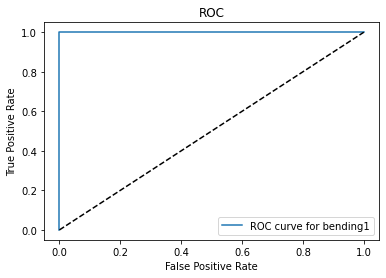

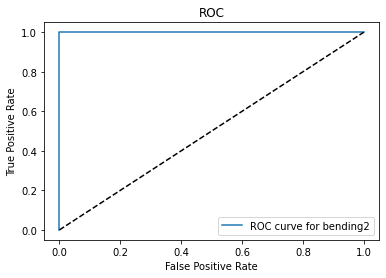

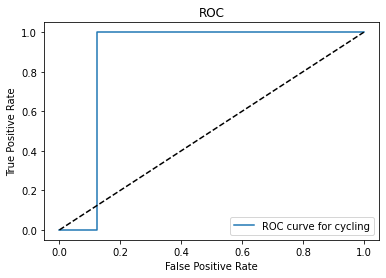

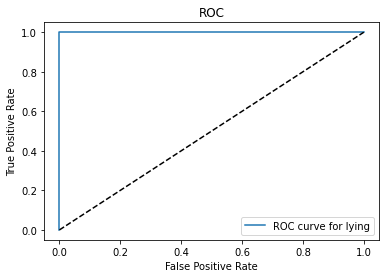

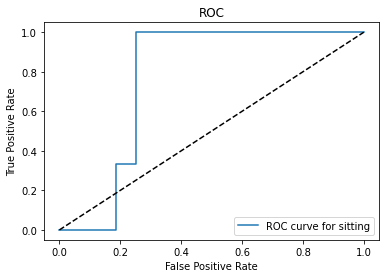

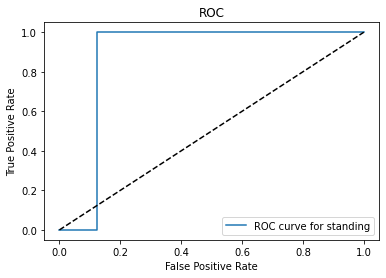

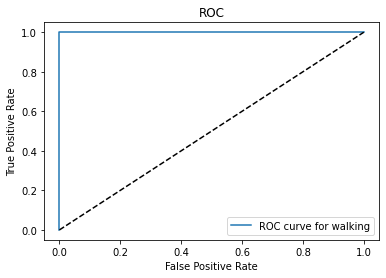

In [727]:
for i in range(7):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve for '+str(dir_name[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")

As above, test results, confusion matrix, and ROC are displayed above. It scored 0.89, which is a pretty good score for multinomial classification.

### ii. Repeat 2(c)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results.
### Gaussian:

In [728]:
Gauss_NB = GaussianNB()
my_Dict = {'L':[], 'Cross_val_score':[]}
for i,df in enumerate(train_list_multi):
    df.dropna(inplace = True)
    target = df['label']
    feature = df.drop(columns = 'label')
    my_Dict['L'].append(i+1)
    my_Dict['Cross_val_score'].append(cross_val_score(Gauss_NB, feature, target, cv = 3).mean())

In [729]:
my_df = pd.DataFrame(my_Dict)
my_df

L  Cross_val_score
0    1         0.822793
1    2         0.822793
2    3         0.720026
3    4         0.733860
4    5         0.646904
5    6         0.632411
6    7         0.660738
7    8         0.691041
8    9         0.662714
9   10         0.573123
10  11         0.631094
11  12         0.587615
12  13         0.615942
13  14         0.632411
14  15         0.559289
15  16         0.559289
16  17         0.528986
17  18         0.515152
18  19         0.485507
19  20         0.500000

In [730]:
cleaned_df = my_df
score = cleaned_df['Cross_val_score'].tolist()
best_model = cleaned_df.loc[cleaned_df['Cross_val_score'] == max(score)][1:2]
best_model

L  Cross_val_score
1  2         0.822793

In [731]:
test_frame = {'label':[]}
split_test = np.linspace(0,9120,num = 20)
for i in range(2):
    for j in range(6):
        test_frame['min'+str(j+1)+'part'+str(i+1)] = []
        test_frame['max'+str(j+1)+'part'+str(i+1)] = []
        test_frame['mean'+str(j+1)+'part'+str(i+1)] = []
subsplit = np.linspace(0,480,num = 3)
for i in range(len(split_test)-1):
    data = Test_df.iloc[int(split_test[i]):int(split_test[i+1])]
    test_frame['label'].append(data.loc[0,'label'])
    part = []
    for j in range(2):
        pt = data.iloc[int(subsplit[j]):int(subsplit[j+1])]
        part.append(pt)
    for k in range(2):
        for col in range(6):
            test_frame['min'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].min())
            test_frame['max'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].max())
            test_frame['mean'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].mean())
test_df = pd.DataFrame(test_frame)

In [733]:
df = train_list_multi[1]
df.dropna(inplace = True)
target = df['label']
feature = df.drop(columns = 'label')
Gauss_NB = GaussianNB().fit(feature, target)
test_feature = test_df.drop(columns = 'label')
test_target = test_df['label'].values
test_pred = Gauss_NB.predict(test_feature)
score_test = Gauss_NB.score(test_feature,test_target)
print(f'The test score for GaussianNB is: {score_test}')

The test score for GaussianNB is: 0.8947368421052632


In [734]:
cm = confusion_matrix(test_target, test_pred)
cm

array([[2, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0],
       [0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 3]])

In [735]:
score = Gauss_NB.predict_proba(test_feature)

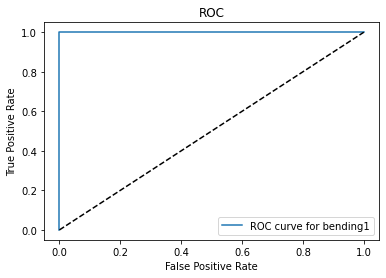

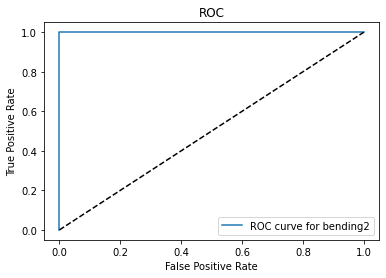

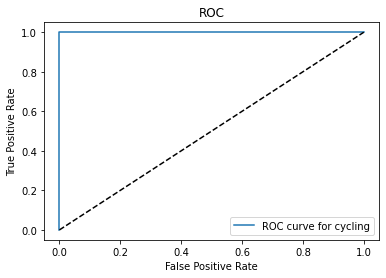

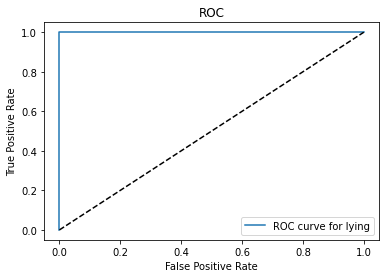

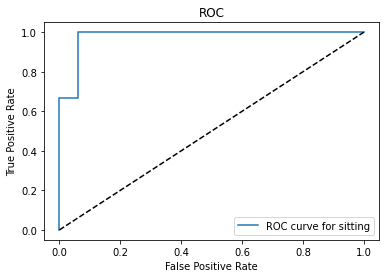

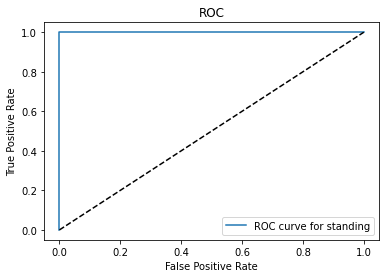

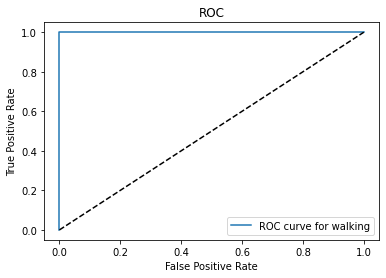

In [736]:
fpr = dict()
tpr = dict()
y_test = label_binarize(test_target, classes=dir_name)
for i in range(7):
    fpr[i], tpr[i], thod = roc_curve(y_test[:, i], score[:, i])
for i in range(7):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve for '+str(dir_name[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")

### Multinomial:

In [737]:
Mult_NB = MultinomialNB()
my_Dict = {'L':[], 'Cross_val_score':[]}
for i,df in enumerate(train_list_multi):
    df.dropna(inplace = True)
    target = df['label']
    feature = df.drop(columns = 'label')
    my_Dict['L'].append(i+1)
    my_Dict['Cross_val_score'].append(cross_val_score(Mult_NB, feature, target, cv = 3).mean())
my_df = pd.DataFrame(my_Dict)
my_df

L  Cross_val_score
0    1         0.764163
1    2         0.689723
2    3         0.749012
3    4         0.792490
4    5         0.764163
5    6         0.777997
6    7         0.733860
7    8         0.763505
8    9         0.748353
9   10         0.749012
10  11         0.749012
11  12         0.748353
12  13         0.749012
13  14         0.704875
14  15         0.733860
15  16         0.719368
16  17         0.763505
17  18         0.733860
18  19         0.719368
19  20         0.719368

In [738]:
cleaned_df = my_df
score = cleaned_df['Cross_val_score'].tolist()
best_model = cleaned_df.loc[cleaned_df['Cross_val_score'] == max(score)]
best_model

L  Cross_val_score
3  4          0.79249

In [739]:
test_frame = {'label':[]}
split_test = np.linspace(0,9120,num = 20)
for i in range(4):
    for j in range(6):
        test_frame['min'+str(j+1)+'part'+str(i+1)] = []
        test_frame['max'+str(j+1)+'part'+str(i+1)] = []
        test_frame['mean'+str(j+1)+'part'+str(i+1)] = []
subsplit = np.linspace(0,480,num = 5)
for i in range(len(split_test)-1):
    data = Test_df.iloc[int(split_test[i]):int(split_test[i+1])]
    test_frame['label'].append(data.loc[0,'label'])
    part = []
    for j in range(4):
        pt = data.iloc[int(subsplit[j]):int(subsplit[j+1])]
        part.append(pt)
    for k in range(4):
        for col in range(6):
            test_frame['min'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].min())
            test_frame['max'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].max())
            test_frame['mean'+str(col+1)+'part'+str(k+1)].append(part[k][part[k].columns[col+1]].mean())
test_df = pd.DataFrame(test_frame)

In [742]:
df = train_list_multi[3]
df.dropna(inplace = True)
target = df['label']
feature = df.drop(columns = 'label')
Mult_NB = MultinomialNB().fit(feature, target)
test_feature = test_df.drop(columns = 'label')
test_target = test_df['label'].values
test_pred = Mult_NB.predict(test_feature)
score_test = Mult_NB.score(test_feature,test_target)
print(f'The test score for MultinomialNB is: {score_test}')

The test score for MultinomialNB is: 0.7368421052631579


In [743]:
cm = confusion_matrix(test_target, test_pred)
cm

array([[2, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 2, 1, 0],
       [0, 0, 0, 0, 2, 1, 0],
       [0, 0, 0, 0, 0, 0, 3]])

In [744]:
score = Mult_NB.predict_proba(test_feature)

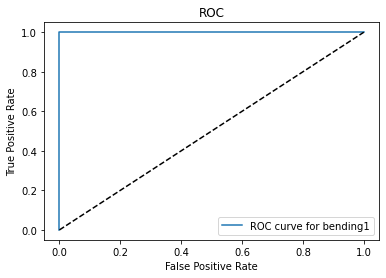

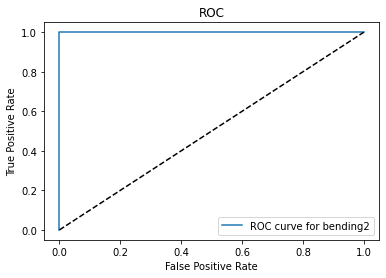

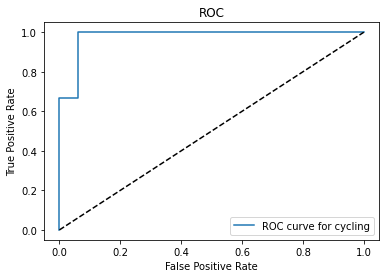

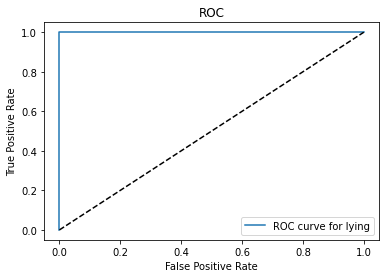

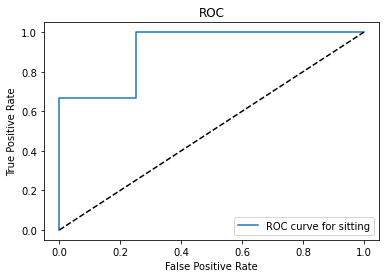

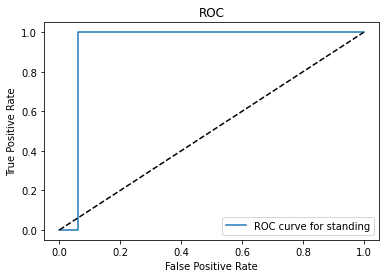

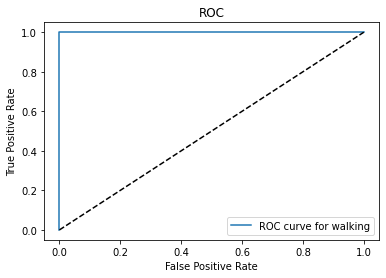

In [745]:
fpr = dict()
tpr = dict()
y_test = label_binarize(test_target, classes=dir_name)
for i in range(7):
    fpr[i], tpr[i], thod = roc_curve(y_test[:, i], score[:, i])
for i in range(7):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve for '+str(dir_name[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")

As above, I performed both Gaussian and Multinomial Naive Bayes classification, I found that GaussianNB has higher score on test data. MultinomialNB is more fitted to the multinomial distribution like test file. In this case Gaussian has higher accuracy for test set.

### iii. Which method is better for multi-class classification in this problem?

Naive bayes with Gaussian and L-1 penalized logistic regression both has accuracy score 0.8947 on test set. However, some of the classes are linearly seperable and I have to manually adjust the maximum iteration. Also, naive bayes takes far less time than logistic regression here, espercially when I cross-validate the data. So, I'll say naive bayes with Gaussian is better model in this problem.

# ISLR 4.8.3

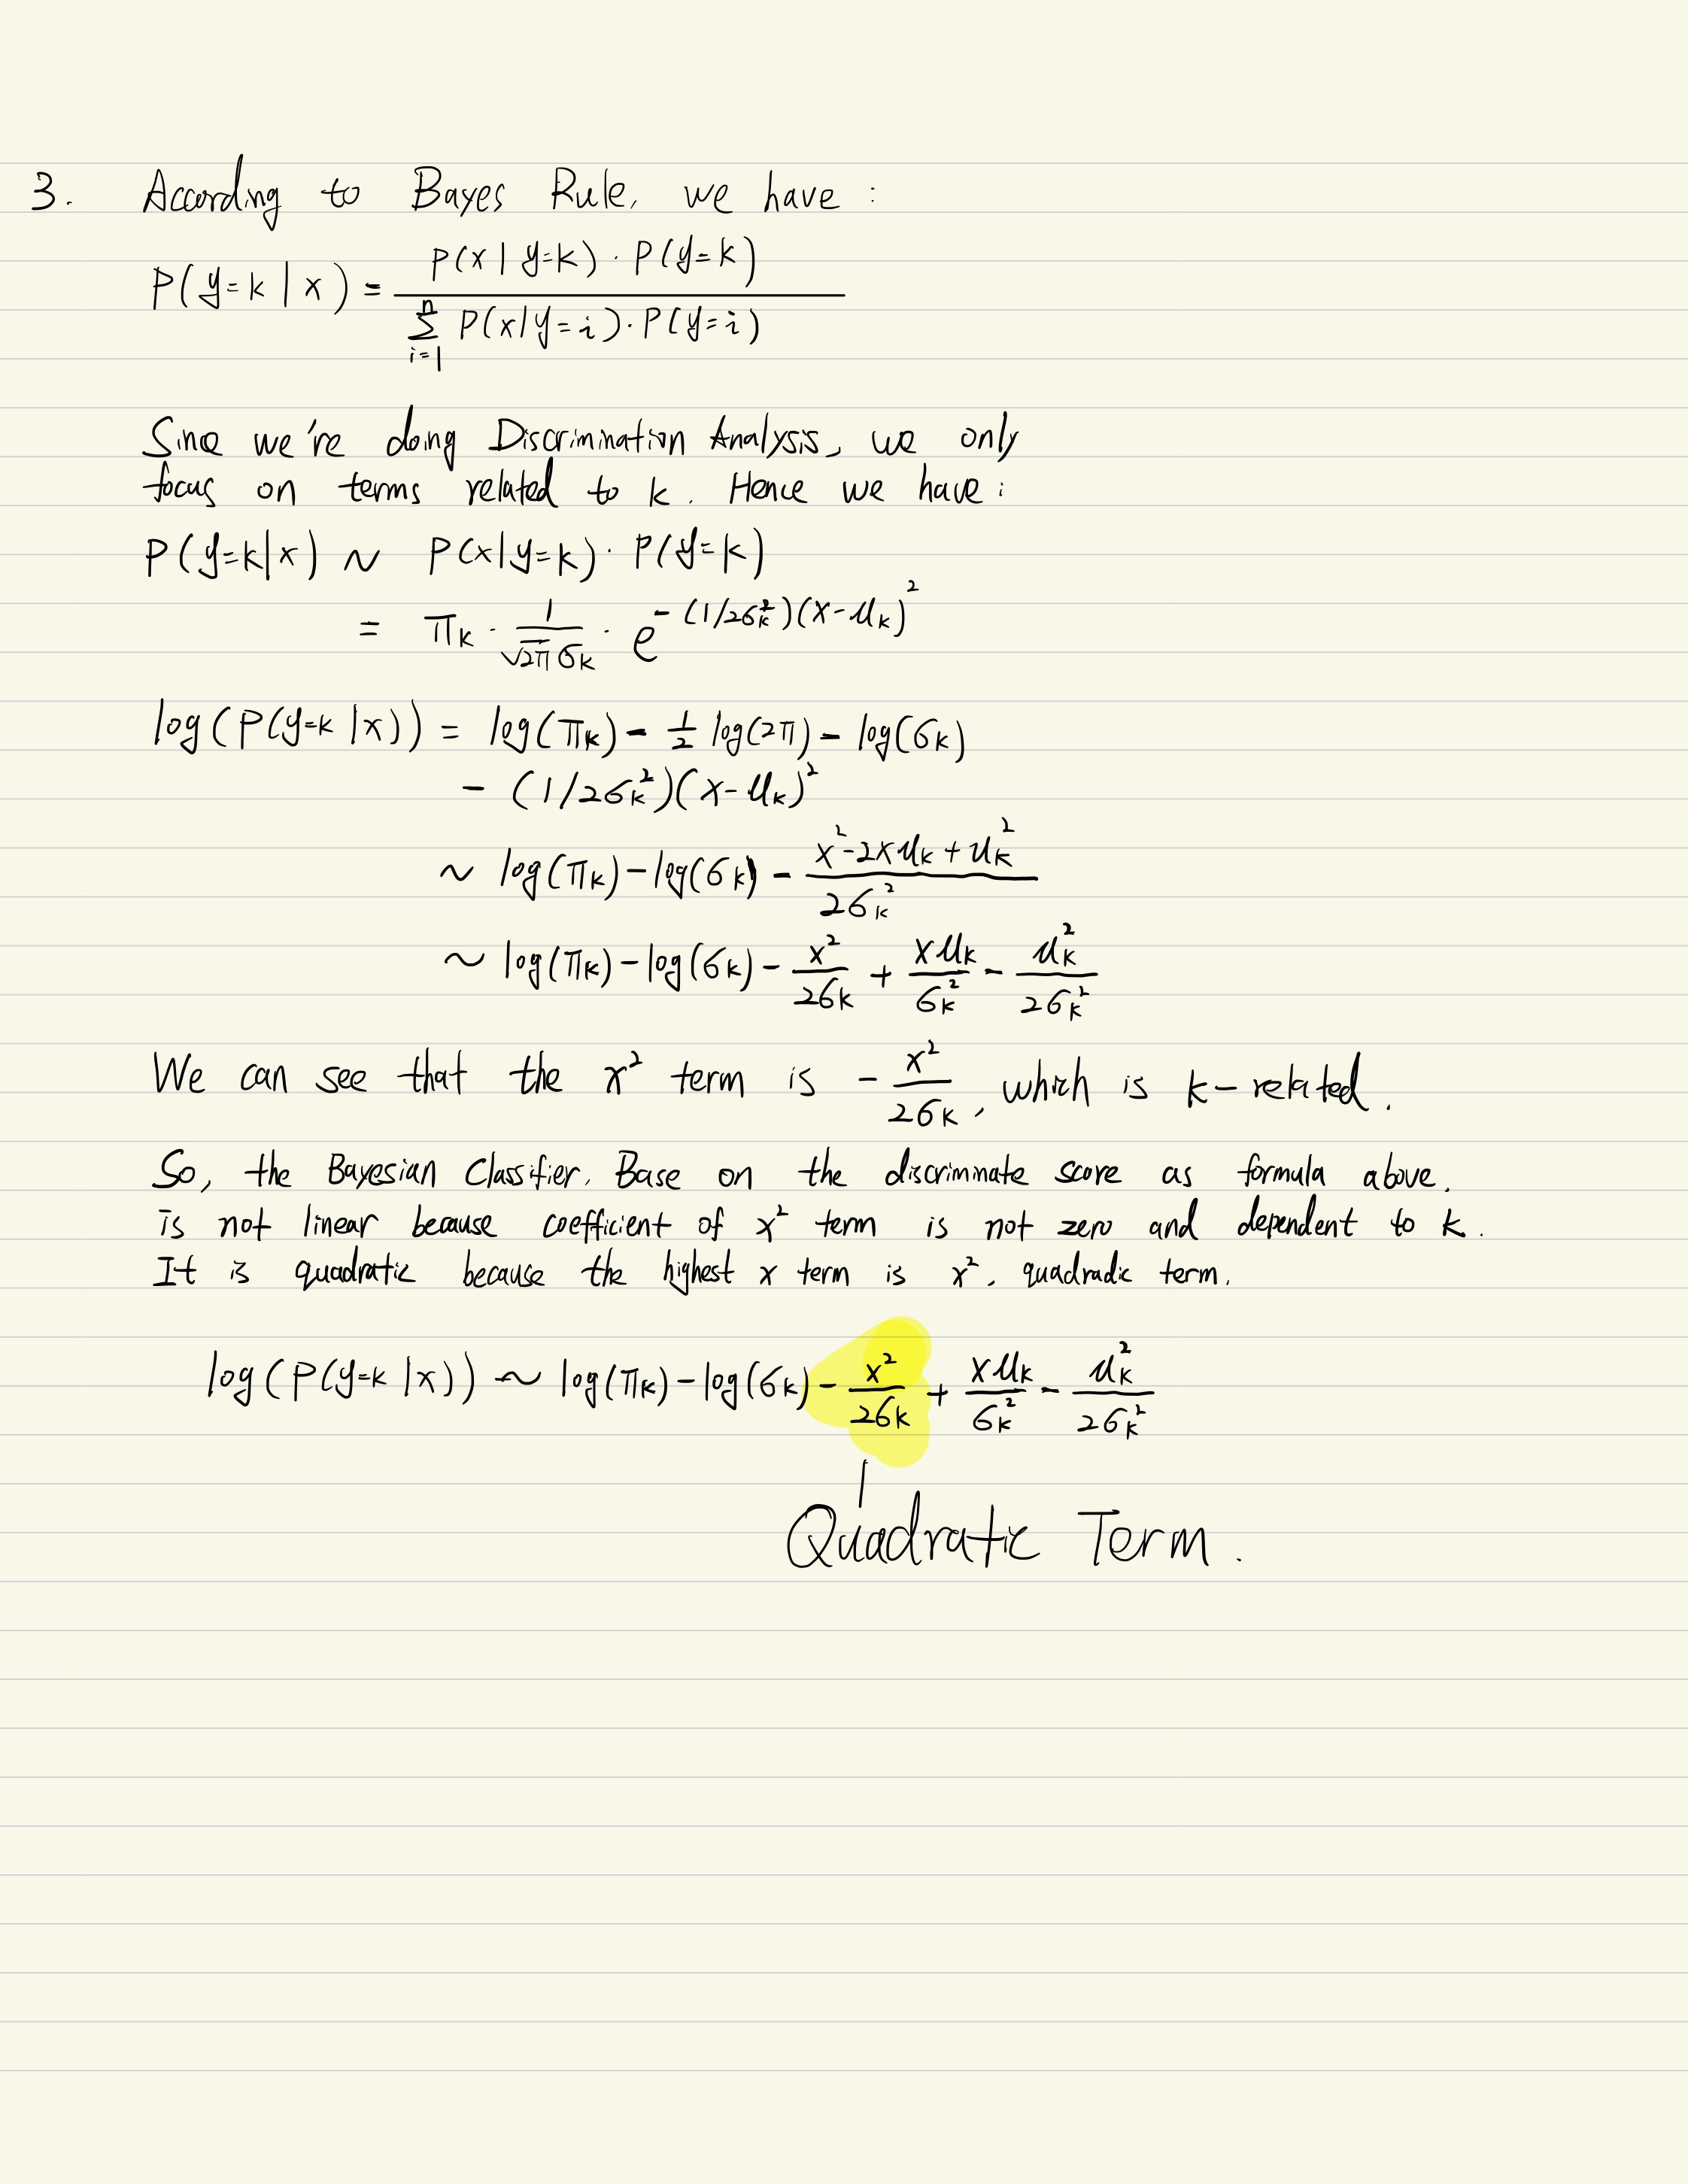

# ISLR 4.8.7

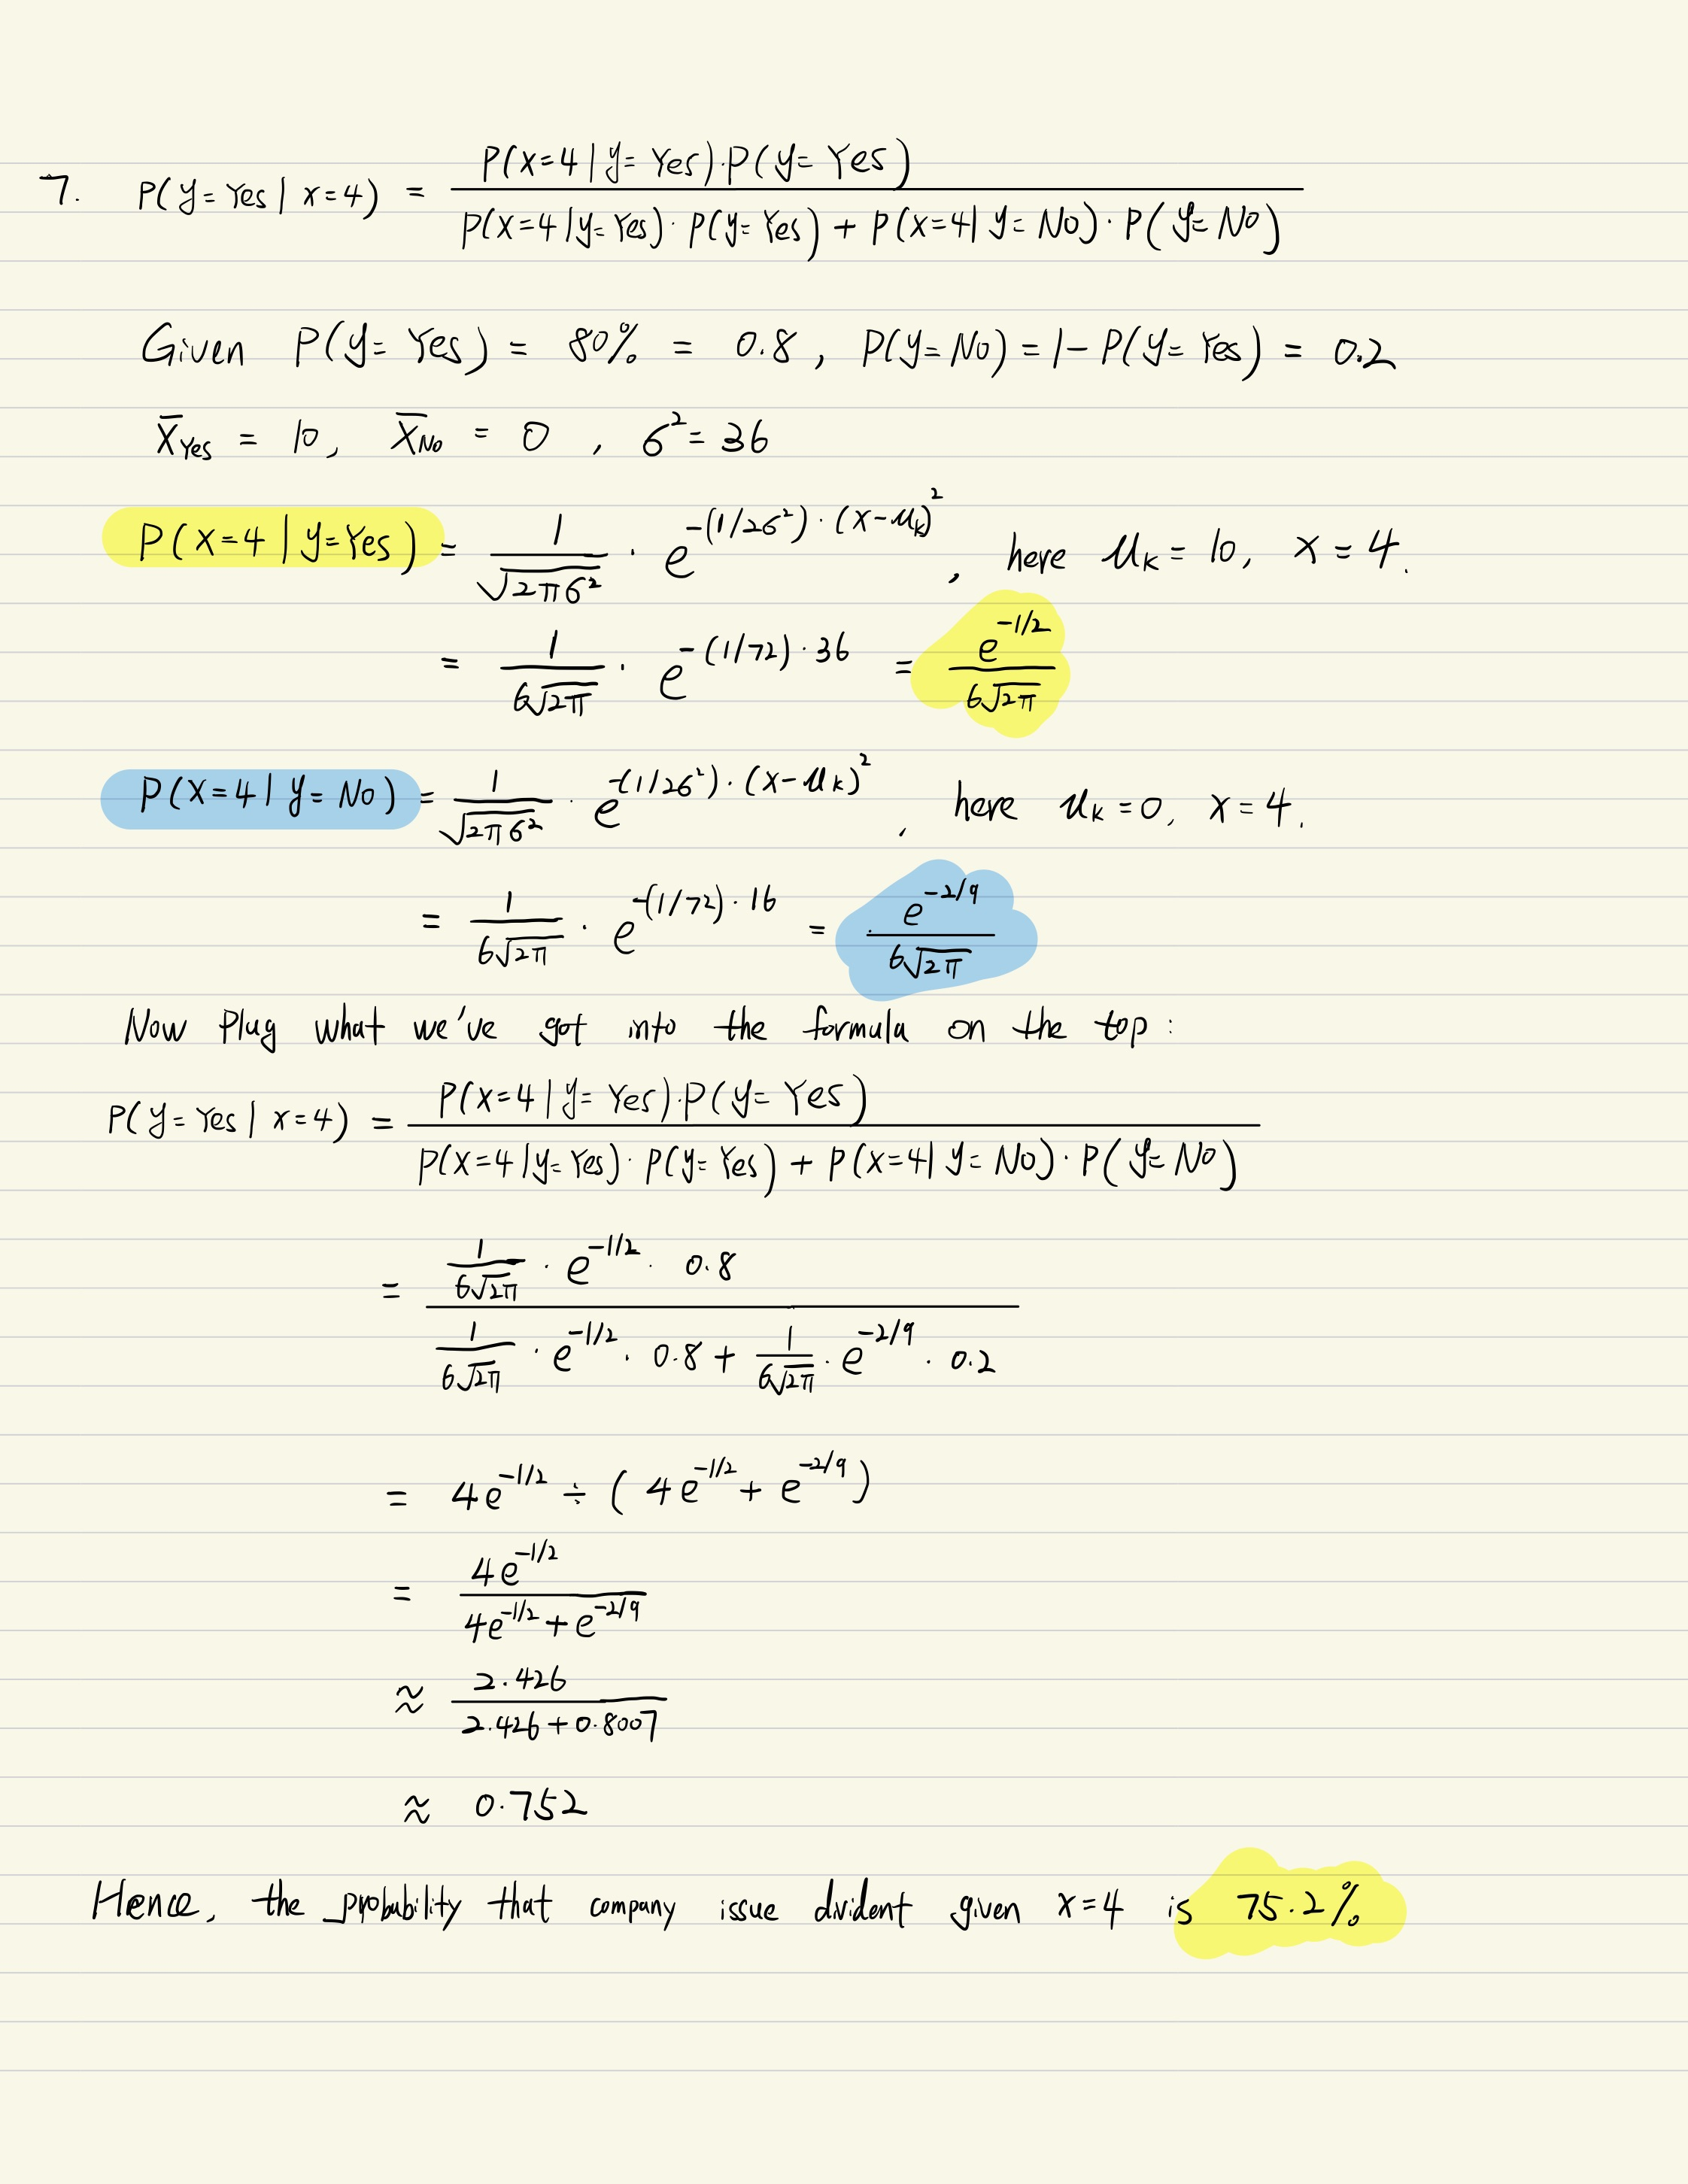